C:\Users\arm3b\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\arm3b\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\arm3b\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


น้ำหนัก 15
ปริมาณเสื้อผ้า 8.5
ความเร็วที่ได้ 8.550513698630137


C:\Users\arm3b\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


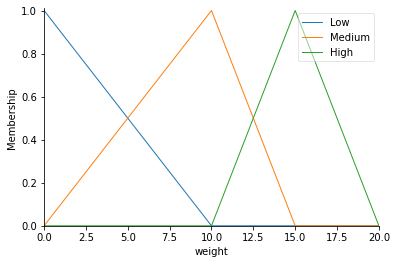

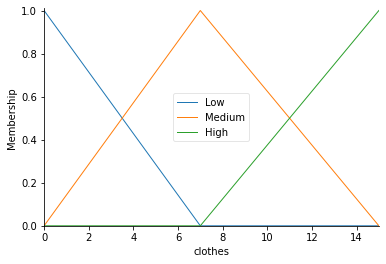

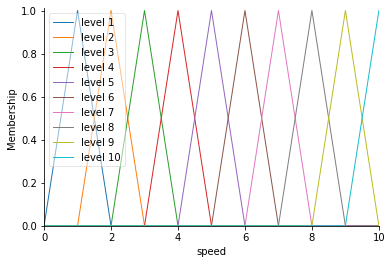

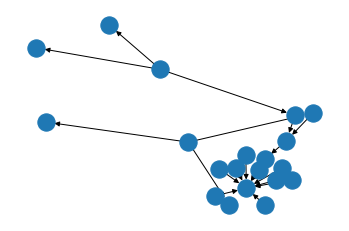

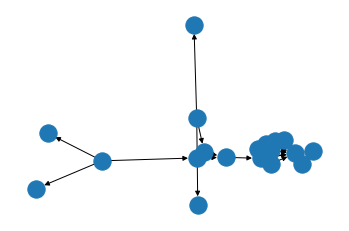

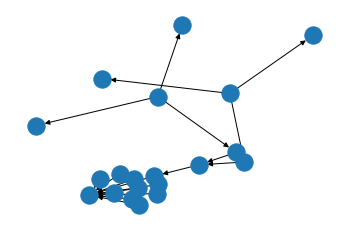

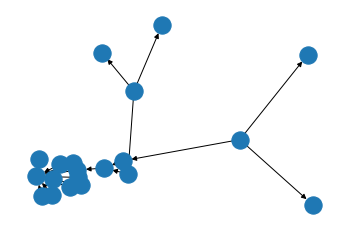

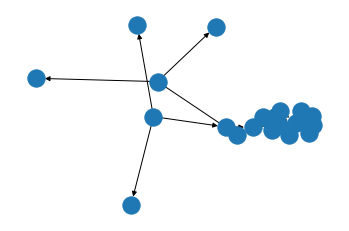

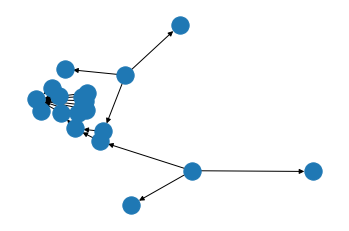

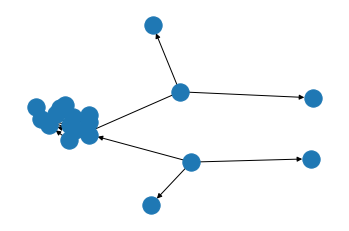

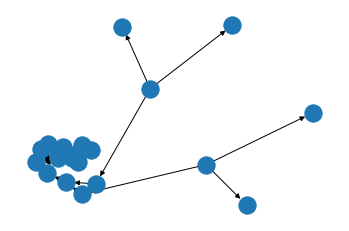

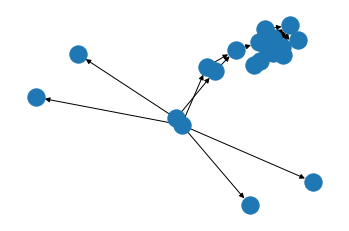

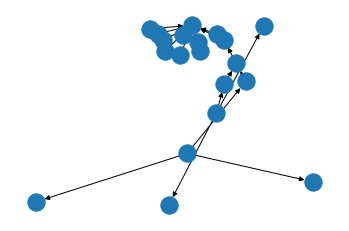

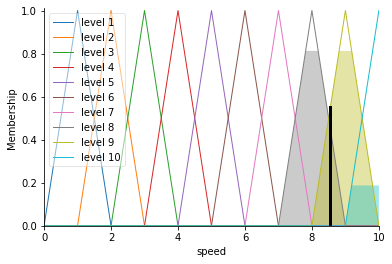

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

inputX = ctrl.Antecedent(np.arange(0, 21, 1), 'weight')
inputY = ctrl.Antecedent(np.arange(0, 16, 1), 'clothes')
outputZ = ctrl.Consequent(np.arange(0, 11, 1), 'speed')

#ขนาดถัง
inputX['Low'] = fuzz.trimf(inputX.universe, [0, 0, 10])
inputX['Medium'] = fuzz.trimf(inputX.universe, [0, 10, 15])
inputX['High'] = fuzz.trimf(inputX.universe, [10, 15, 20])
#ขนาดของเสื้อผ้า
inputY['Low'] = fuzz.trimf(inputY.universe, [0, 0, 7])
inputY['Medium'] = fuzz.trimf(inputY.universe, [0, 7, 15])
inputY['High'] = fuzz.trimf(inputY.universe, [7, 15, 20])
#ระดับเครื่องซักผ้า
outputZ['level 1'] = fuzz.trimf(outputZ.universe, [0, 1, 2])
outputZ['level 2'] = fuzz.trimf(outputZ.universe, [1, 2, 3])
outputZ['level 3'] = fuzz.trimf(outputZ.universe, [2, 3, 4])
outputZ['level 4'] = fuzz.trimf(outputZ.universe, [3, 4, 5])
outputZ['level 5'] = fuzz.trimf(outputZ.universe, [4, 5, 6])
outputZ['level 6'] = fuzz.trimf(outputZ.universe, [5, 6, 7])
outputZ['level 7'] = fuzz.trimf(outputZ.universe, [6, 7, 8])
outputZ['level 8'] = fuzz.trimf(outputZ.universe, [7, 8, 9])
outputZ['level 9'] = fuzz.trimf(outputZ.universe, [8, 9, 10])
outputZ['level 10'] = fuzz.trimf(outputZ.universe, [9, 10,10])
inputX.view()
inputY.view()
outputZ.view()


rule1 = ctrl.Rule(inputX['Low'] & inputY['Low'], outputZ['level 1'])
rule2 = ctrl.Rule(inputX['Low'] & inputY['Medium'], outputZ['level 3'])
rule3 = ctrl.Rule(inputX['Low'] & inputY['High'], outputZ['level 4'])
rule4 = ctrl.Rule(inputX['Medium'] & inputY['Low'], outputZ['level 3'])
rule5 = ctrl.Rule(inputX['Medium'] & inputY['Medium'], outputZ['level 5'])
rule6 = ctrl.Rule(inputX['Medium'] & inputY['High'], outputZ['level 8'])
rule7 = ctrl.Rule(inputX['High'] & inputY['Low'], outputZ['level 7'])
rule8 = ctrl.Rule(inputX['High'] & inputY['Medium'], outputZ['level 9'])
rule9 = ctrl.Rule(inputX['High'] & inputY['High'], outputZ['level 10'])
rule10 = ctrl.Rule(inputX['High'] & inputY['Medium'], outputZ['level 8'])

rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()


tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
weight = tipping.input['weight'] = 15
clothes = tipping.input['clothes'] = 8.5
tipping.compute()
print("น้ำหนัก",weight)
print("ปริมาณเสื้อผ้า",clothes )
print("ความเร็วที่ได้",tipping.output['speed'])
outputZ.view(sim=tipping)

